In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('../dataset/Preprocessed_Dataset.csv')

In [3]:
dataset.head()

,Location,temperature,humidity,ph,rainfall,label,price,Price_Date
0,Yercaud,20.879744,82.002744,6.502985,202.935536,rice,210,30-Apr-11
1,Vriddhachalam,21.770462,80.319644,7.038096,226.655537,rice,45,1-May-11
2,Virugambakkam,23.004459,82.320763,7.840207,263.964248,rice,70,2-May-11
3,Virudhunagar,26.491096,80.158363,6.980401,242.864034,rice,18,3-May-11
4,Viralimalai,20.130175,81.604873,7.628473,262.717340,rice,37,4-May-11


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.shape

(3100, 8)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     3100 non-null   object 
 1   temperature  3100 non-null   float64
 2   humidity     3100 non-null   float64
 3   ph           3100 non-null   float64
 4   rainfall     3100 non-null   float64
 5   label        3100 non-null   object 
 6   price        3100 non-null   int64  
 7   Price_Date   3100 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 193.9+ KB


In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,3100.0,27.115406,7.561554,8.825675,22.832871,26.126161,29.353375,54.986760
humidity,3100.0,65.960952,23.936495,10.034048,55.290792,68.709147,84.287741,99.981876
ph,3100.0,6.369203,0.807006,3.504752,5.897207,6.346319,6.836312,9.935091
rainfall,3100.0,110.213031,64.048562,20.211267,64.909095,97.057093,141.210784,397.315380
price,3100.0,645.275161,478.680867,1.000000,111.000000,679.000000,1036.250000,1921.000000


In [8]:
dataset.isnull().sum()

Location       0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
price          0
Price_Date     0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [10]:
dataset['class'] = labelencoder.fit_transform(dataset['label'])
dataset.head(5)

,Location,temperature,humidity,ph,rainfall,label,price,Price_Date,class
0,Yercaud,20.879744,82.002744,6.502985,202.935536,rice,210,30-Apr-11,28
1,Vriddhachalam,21.770462,80.319644,7.038096,226.655537,rice,45,1-May-11,28
2,Virugambakkam,23.004459,82.320763,7.840207,263.964248,rice,70,2-May-11,28
3,Virudhunagar,26.491096,80.158363,6.980401,242.864034,rice,18,3-May-11,28
4,Viralimalai,20.130175,81.604873,7.628473,262.717340,rice,37,4-May-11,28


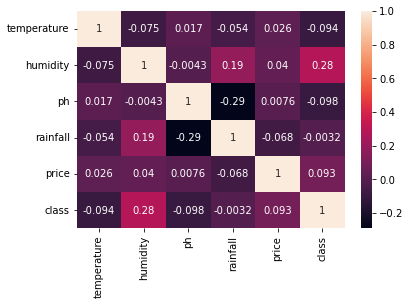

In [11]:
dataset.corr()
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [12]:
X = dataset.iloc[:, [1,2,3,4]].values
Y = dataset.iloc[:, [5]].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42 )

In [14]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2480, 4)
X_test shape: (620, 4)
Y_train shape: (2480, 1)
Y_test shape: (620, 1)


In [15]:
print(X_train)

[[ 17.19628279  13.68862614   5.97052042  53.8727743 ]
 [ 31.32720734  54.17967763   6.62167846 144.8018325 ]
 [ 30.01821337  50.0983181    5.67603258  96.08745082]
 ...
 [ 17.92114547  13.04534931   6.43169009  54.56423739]
 [ 30.85454844  70.0216622    5.42808436 219.745306  ]
 [ 26.36629861  52.25738495   7.45646037 177.3176161 ]]


# support vector classifier

In [16]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

# Naive bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

# KneighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [19]:
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_knn = knn.predict(X_test)


# Model Evaluation

In [20]:
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)

In [21]:
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive bayes: " + str(accuracy_nb * 100))
print("KNN: " + str(accuracy_knn * 100))

Support Vector Classifier: 86.12903225806451
Naive bayes: 93.06451612903226
KNN: 84.67741935483872


In [22]:
c=accuracy_svc * 100
d=accuracy_nb * 100
e=accuracy_knn * 100

In [23]:
scores = [c,d,e]
algorithms = ["Support Vector Machine","Naive bayes","KNN"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Support Vector Machine is: 86.12903225806451 %
The accuracy score achieved using Naive bayes is: 93.06451612903226 %
The accuracy score achieved using KNN is: 84.67741935483872 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

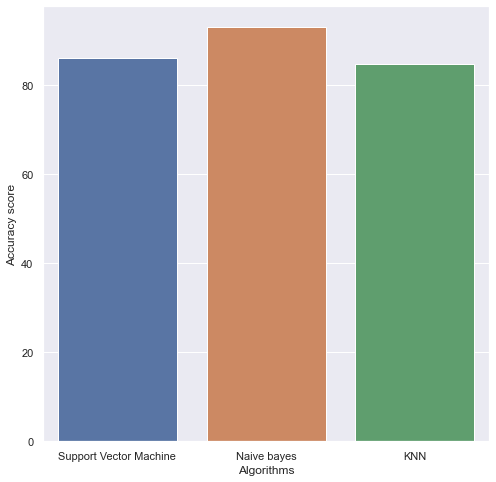

In [24]:
sns.set(rc={'figure.figsize':(8,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

In [25]:
import joblib 
joblib.dump(nb, r'../Models/nb_model1.pkl') 
nb_from_joblib = joblib.load(r'../Models/nb_model1.pkl')  
print("Model successfully created...!")

Model successfully created...!


# Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_nb)

<AxesSubplot:>

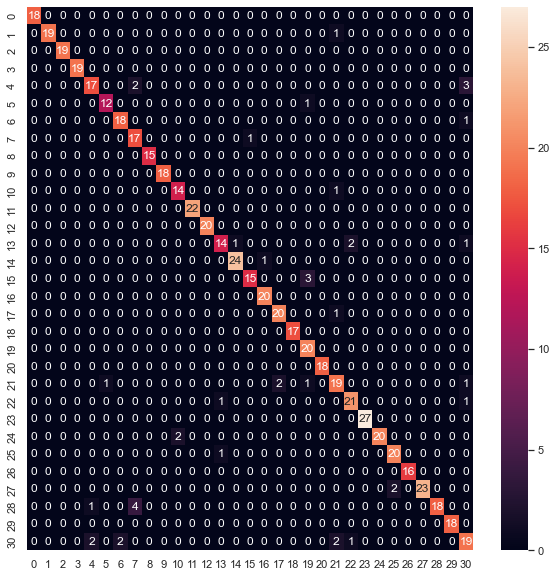

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(pd.DataFrame(cm), annot=True)

In [28]:
X1 = dataset.iloc[:, [1,2,3,4]].values
Y1 = dataset.iloc[:, [6]].values

In [29]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = 0.20, random_state = 42 )

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train1,Y_train1)

KNeighborsClassifier()

In [31]:
import joblib 
joblib.dump(knn, r'../Models/nb_model2.pkl') 
ranfor_from_joblib = joblib.load(r'../Models/nb_model2.pkl')  
print("Model successfully created...!")

Model successfully created...!
